# Practice material involving NFA

Illustration of NFA : animation + subset construction

In [1]:
#----TURN THESE ON IF RUNNING ON JOVE ON COLAB BY REMOVING THE ''' ... '''

'''
! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
import sys
sys.path.append('./Jove')
sys.path.append('./Jove/jove')

from jove.DotBashers import *
from jove.Def_md2mc  import *
from jove.Def_NFA    import *
from jove.Def_DFA    import *
from jove.AnimateNFA import *
'''

#----TURN THESE ON IF RUNNING ON OWN INSTALLATION (default turned-on)

import sys
sys.path[0:0] = ['../..' , '../../3rdparty',
                 
                 '../../..' , '../../../3rdparty',
                 
                 '../../../..' , '../../../../3rdparty',
                 
                 ] # Put these at the head of the search path

#---- THESE ARE THE COMMON IMPORTS, WHICHEVER ROUTE YOU TOOK ABOVE

from jove.DotBashers import *
from jove.Def_md2mc  import *
from jove.Def_NFA    import *
from jove.Def_DFA    import *
from jove.Def_RE2NFA import *
from jove.AnimateNFA import *
 

You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(mkp_dfa)
help(mk_dfa)
help(totalize_dfa)
help(addtosigma_delta)
help(step_dfa)
help(run_dfa)
help(accepts_dfa)
help(comp_dfa)
help(union_dfa)
help(intersect_dfa)
help(pruneUnreach)
help(iso_dfa)
help(langeq_dfa)
help(same_status)
help(h_langeq_dfa)
help(fixptDist)
help(min_dfa)
help(pairFR)
help(state_combos)
help(sepFinNonFin)
help(bash_eql_classes)
help(listminus)
help(bash_1)
help(mk_rep_eqc)
help(F_of)
help(rep_of_s)
help(q0_of)
help(Delta_of)
help(mk_state_eqc_name)

You may use any of these help commands:
help(mk_nfa)
help(totalize_nfa)
help(step_nfa)
help(run_nfa)
help(ec_step_nfa)
help(Eclosure)
help(Echelp)
help(accept

# NFA illustrated in subset construction in the book

In [2]:
# First define animation widgets!!

import ipywidgets as wdg
def run_nfa_slider(N, s, n):
    """Run NFA N from N["Q0"] (which is a set..) on substring s[0:n]
    """
    S = N["Q0"] 
    if (n > len(s)):
        n = len(s)
    print("string = ", s[0:n])
    run_nfa(N, S, s[0:n], True)
    
def run_nfa_int(N1, N2):
    """Run interactively from the given NFA .. from {q0} 
       on input string's substring
       as picked by slider.
    """
    inp = input("Please provide string: ")
    wdg.interact(run_nfa_slider, N = {'N1': N1, 'N2': N2}, 
                 s = inp, n=(0,32))

In [3]:
nfass = md2mc('''
NFA 

I : '' -> A, G

A : '' -> B, C

B : 1 -> D

C : 0 -> E

D : '' -> A, G

E : '' -> A, G

G : 1 -> F

''')

In [4]:
nfa3L = md2mc('''

NFA


I : 0|1 -> I

I : '' -> A

A : 1 -> B

B : 0|1 -> C

C : 0|1 -> F

''')
              
              

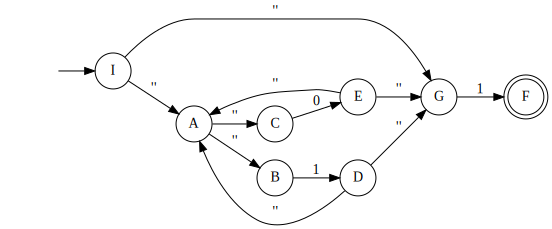

In [5]:
dotObj_nfa(nfass)

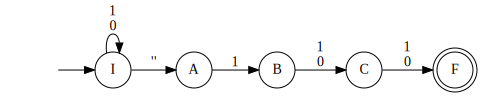

In [6]:
dotObj_nfa(nfa3L, FuseEdges="True")

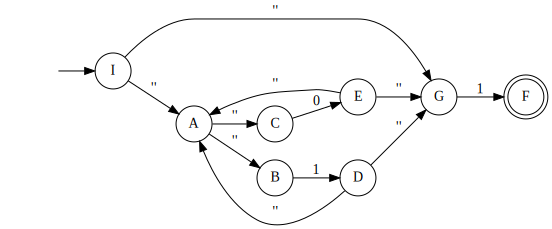

In [7]:
dotObj_nfa(nfass)

## This example is highly worth studying via animations

Put it in animate mode, and then single-step to see the EClosure of states

In [8]:

display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))

AnimateNFA(nfass, FuseEdges=False)

In [9]:
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))

AnimateNFA(nfa3L, FuseEdges=False)

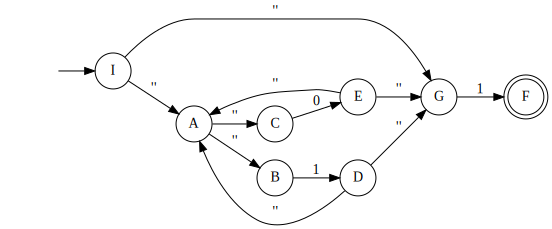

In [10]:

dotObj_nfa(nfass, FuseEdges="True")

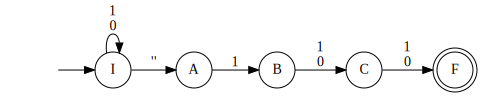

In [11]:
dotObj_nfa(nfa3L, FuseEdges="True")

# Let's understand EClosure etc

In [12]:
run_nfa_int(nfass, nfa3L)

Please provide string: 


interactive(children=(Dropdown(description='N', options={'N1': {'Q': {'I', 'C', 'E', 'G', 'B', 'A', 'D', 'F'},…